# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

<span style="color:blue">
    
### Problem:

The executives at E-news Express, an online news portal, are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

### Purpose: 

E-news Express aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.


### Action taken:

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page.


### What is the ask for the Data Scientist?

Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

(a) Do the users spend more time on the new landing page than on the existing landing page?

(b) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

(c) Does the converted status depend on the preferred language?

(d) Is the time spent on the new page the same for the different language users?
    
</span>


## Import all the necessary libraries

In [2]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [280]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
(100, 6)


In [281]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
df.describe(include='O').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [283]:
df["group"].unique()
df["converted"].unique()
df["landing_page"].unique()
df["language_preferred"].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [284]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [285]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [286]:
duplicateRows = df[df.duplicated(['user_id'])]
duplicateRows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


<span style="color:blue">
    
#### Observations:

(1) There are a total of 100 non-null observations in each of the columns.

(2) The dataset contains 6 columns: time_spent_on_the_page is the only floating type column and the rest are object type. 

(3) There are no missing values in the data.
    
(4) The min and max time spent by a user on the landing page are 0.19 and 10.71 minutes respectively. The average time spent is 5.37 minutes.  
    
(5) From the sample 
    
       (i) there are 3 unique languages chosen by the user to view the landing page. They are Spanish, English and French.
    
       (ii) Spanish and French languages are the most chosen languages
    
(6) There are no duplicated rows for user_id column

</span>


### Univariate Analysis

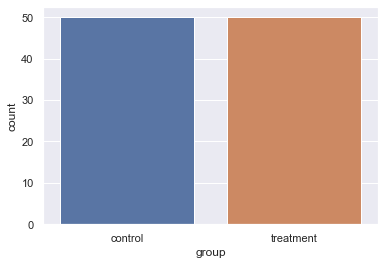

In [287]:
#insights into group column
sns.countplot(data=df, x='group') ;

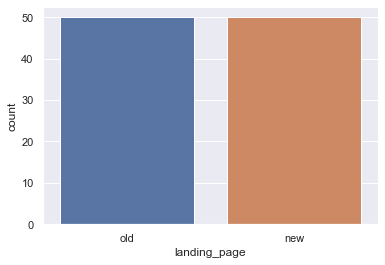

In [288]:
#insights into landing_page column
sns.countplot(data=df, x='landing_page') ; 

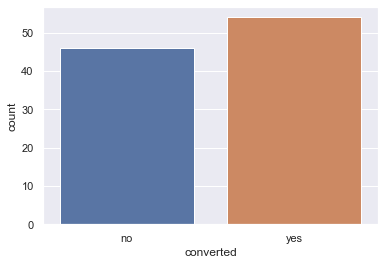

In [289]:
#insights into converted column
sns.countplot(data=df, x='converted') ;

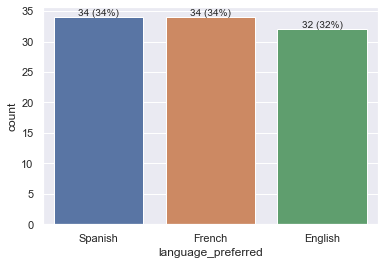

In [290]:
#insights into language_preferred column
ax = sns.countplot(x=df['language_preferred'],
                   order=df['language_preferred'].value_counts(ascending=False).index);
        
abs_values = df['language_preferred'].value_counts(ascending=False)
rel_values = df['language_preferred'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

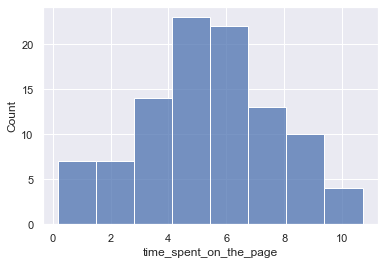

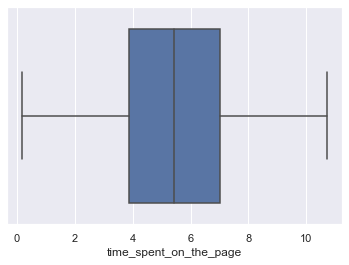

In [291]:
#insights into time_spent_on_the_page column
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

### Bivariate Analysis

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

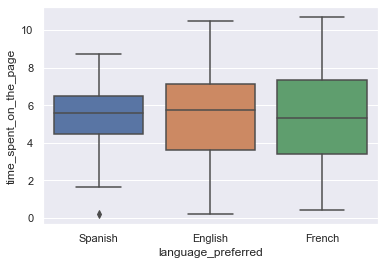

In [292]:
#insights into time_spent_on_the_page vs language preferred column
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df)

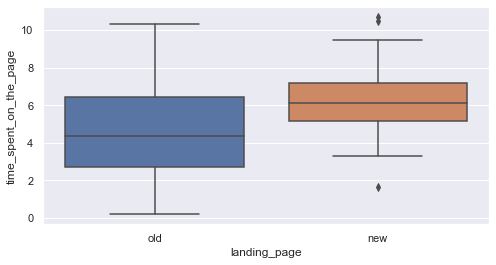

In [326]:
#insights into time_spent_on_the_page vs landing_page column
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df);

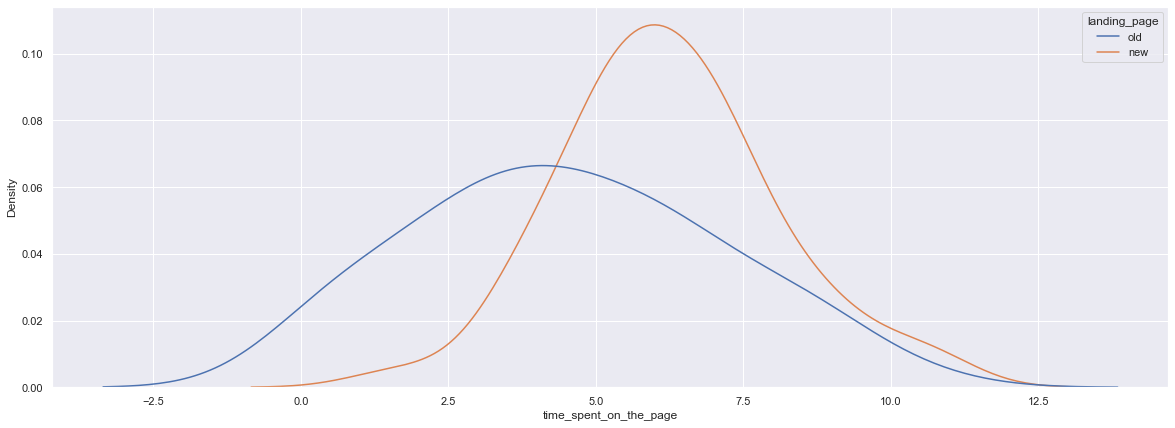

In [294]:
plt.figure(figsize=(20,7))
sns.kdeplot(x = 'time_spent_on_the_page', data = df, hue = 'landing_page');

<Axes: xlabel='time_spent_on_the_page', ylabel='Density'>

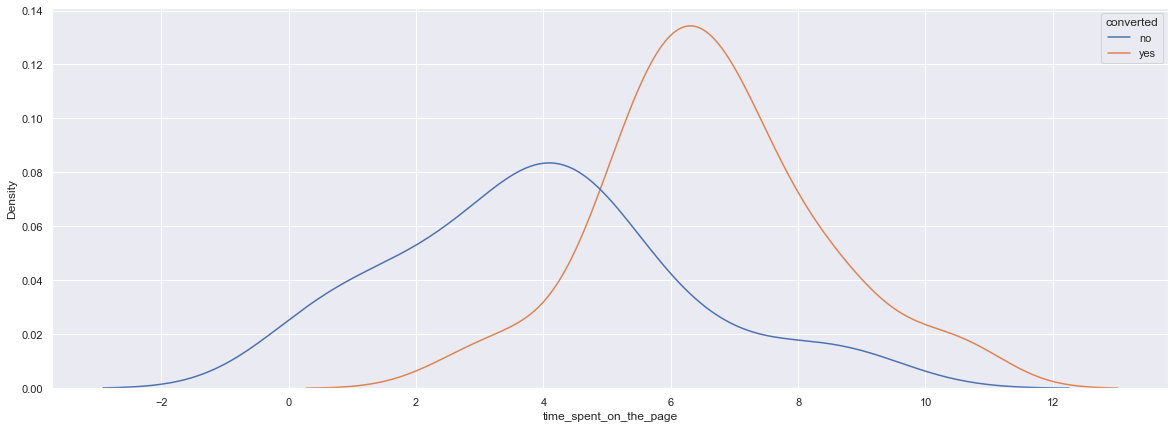

In [295]:
plt.figure(figsize=(20,7))
sns.kdeplot(x = 'time_spent_on_the_page', data = df, hue = 'converted')

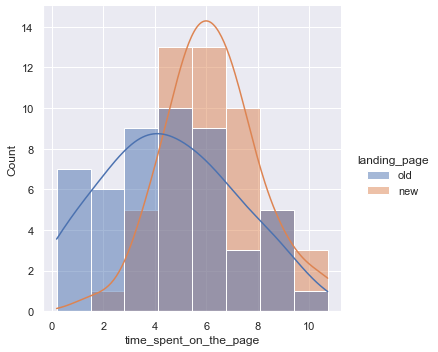

In [296]:
sns.displot(x = 'time_spent_on_the_page', data = df, hue = 'landing_page', kde = True);

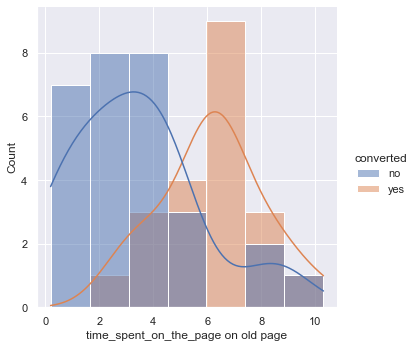

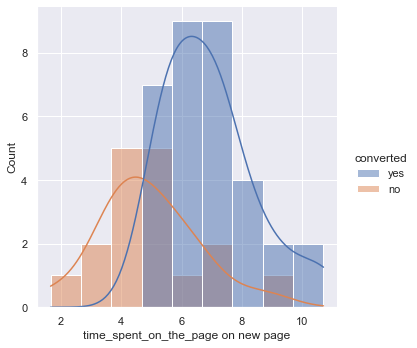

In [297]:
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)});
df1 = df.loc[df['landing_page'] == 'old']
df2 = df.loc[df['landing_page'] == 'new']

ax = sns.displot(x = 'time_spent_on_the_page', data = df1, hue = 'converted', kde = True)
ax1 = sns.displot(x = 'time_spent_on_the_page', data = df2, hue = 'converted', kde = True)

ax.set(xlabel='time_spent_on_the_page on old page')
ax1.set(xlabel='time_spent_on_the_page on new page')

plt.show()

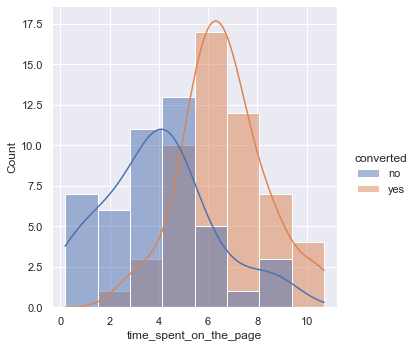

In [298]:
sns.displot(x = 'time_spent_on_the_page', data = df, hue = 'converted', kde = True);

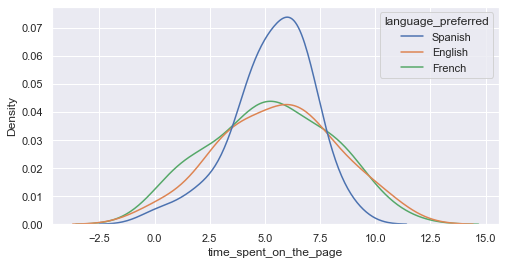

In [299]:
sns.kdeplot(x = 'time_spent_on_the_page', data = df, hue = 'language_preferred');

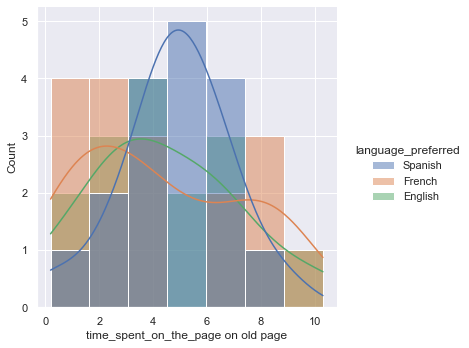

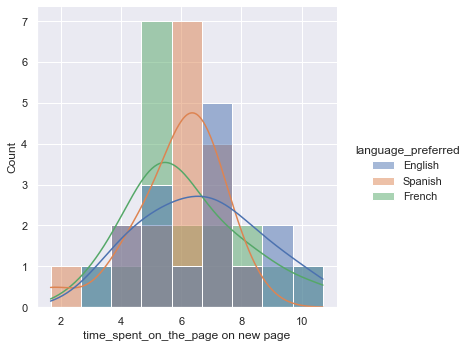

In [300]:
ax = sns.displot(x = 'time_spent_on_the_page', data = df1, hue = 'language_preferred', kde = True)
ax1 = sns.displot(x = 'time_spent_on_the_page', data = df2, hue = 'language_preferred', kde = True)

ax.set(xlabel='time_spent_on_the_page on old page')
ax1.set(xlabel='time_spent_on_the_page on new page')

plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

<span style="color:blue">
    
### Perform Visual Analysis
    
</span>

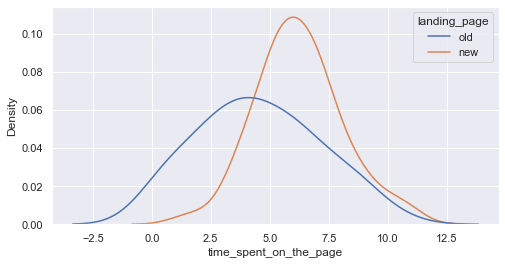

In [301]:
sns.kdeplot(x = 'time_spent_on_the_page', data = df, hue = 'landing_page');

<span style="color:blue">
    
### Step 1: Define the null and alternate hypotheses
    
</span>

<span style="color:blue">
    
Let $\mu_1, \mu_2$ be the mean time spent on the old and new landing page respectively.

We will test the null hypothesis i.e There is no difference in the mean time spent on the new page and the old page.

>$H_0:\mu_2=\mu_1$      

against the alternate hypothesis i.e The mean time spent on the new page is greater than the time spent on the old page.

>$H_a:\mu_2\ > \mu_1$
    
</span>

<span style="color:blue">
    
### Step 2: Select Appropriate test
    
</span>

In [302]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the old page is ' + str(df.loc[df['landing_page'] == 'old']["time_spent_on_the_page"].mean()))
print('The mean time spent on the new page is ' + str(df.loc[df['landing_page'] == 'new']["time_spent_on_the_page"].mean()))
print('The standard deviation time spent on old page is ' + str(df.loc[df['landing_page'] == 'old']["time_spent_on_the_page"].std()))
print('The standard deviation time spent on new page is ' + str(df.loc[df['landing_page'] == 'new']["time_spent_on_the_page"].std()))


The mean time spent on the old page is 4.532400000000001
The mean time spent on the new page is 6.2232
The standard deviation time spent on old page is 2.581974849306046
The standard deviation time spent on new page is 1.8170310387878263


<span style="color:blue">
    
## Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on a page is continuous.
* Normally distributed populations - We will assume that they are normally distributed.
* Independent populations - As we are taking random samples for two different groups (old and new), the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

## We can use two sample ind T-test for this problem.
    
</span>

<span style="color:blue">
    
### Step 3: Decide the significance level
    
</span>

In [303]:
alpha = 0.05

<span style="color:blue">
    
### Step 4: Collect and prepare data
    
</span>

In [304]:
df1 = df.loc[df['landing_page'] == 'old']
df1_xbar1 = df1["time_spent_on_the_page"].mean()
print(df1_xbar1)
df2 = df.loc[df['landing_page'] == 'new']
df2_xbar2 = df2["time_spent_on_the_page"].mean()
print(df2_xbar2)

4.532400000000001
6.2232


In [305]:
df1 = df.loc[df['landing_page'] == 'old']
df1_s1 = df1["time_spent_on_the_page"].std()
print(df1_s1)
df2 = df.loc[df['landing_page'] == 'new']
df2_s2 = df2["time_spent_on_the_page"].std()
print(df2_s2)

2.581974849306046
1.8170310387878263


<span style="color:blue">
    
### Step 5: Calculate the p-value
    
</span>

In [306]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df2['time_spent_on_the_page'], df1['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)
print('The test statictic is ', test_stat)

# Compute critical region values

#one-tail
df_Critical = len(df1) - 1 #choose the smaller data set. In this example both samples are equal
critical_region = stats.t.ppf(1 - alpha, df_Critical)
print('The critical value for one tailed test is ', critical_region)

#Two-tail
df_Critical = len(df1) + len(df2) - 2
critical_region = stats.t.ppf(1 - alpha / 2, df_Critical)
print('The critical value for two tailed test is ', critical_region)


The p-value is  0.0001392381225166549
The test statictic is  3.7867702694199856
The critical value for one tailed test is  1.6765508919142629
The critical value for two tailed test is  1.984467454426692


<span style="color:blue">
    
### Step 6: Compare the p-value with $\alpha$
    
</span>

In [307]:
    if p_value > alpha:
        state = "we do not have enough statistical evidence to reject the null hypothesis."
    else:
        state = "we do have enough statistical evidence to reject the null hypothesis."
print(state)      

we do have enough statistical evidence to reject the null hypothesis.


<span style="color:blue">
    
### Step 7:  Draw inference
    
</span>

<span style="color:blue">
    
### Insight
As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to say that the time spent on the new landing page is more than the time spent on the old page.
    
</span>

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

<span style="color:blue">
    
### Visualize the data 
    
</span>

For the old landing page, out of 50 users 21 users are converted
For the new landing page, out of 50 users 33 users are converted


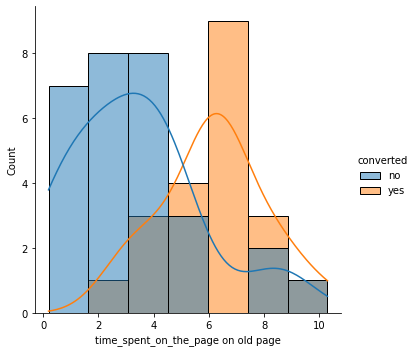

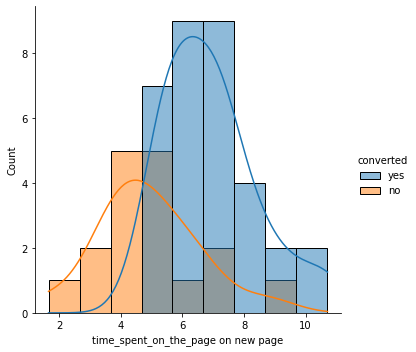

In [4]:
df = pd.read_csv('abtest.csv')
df1 = df.loc[df['landing_page'] == 'old']
df1_converted = df1.loc[df1["converted"] == 'yes']
df1_notconverted = df1.loc[df1["converted"] == 'no']
df1_c = len(df1_converted)
df1_nc = len(df1_notconverted)

df2 = df.loc[df['landing_page'] == 'new']
df2_converted = df2.loc[df2["converted"] == 'yes']
df2_notconverted = df2.loc[df2["converted"] == 'no']
df2_c = len(df2_converted)
df2_nc = len(df2_notconverted)

print('For the old landing page, out of ' + str(len(df1)) +  ' users ' + str(df1_c)  + ' users are converted' )
print('For the new landing page, out of ' + str(len(df2)) +  ' users ' + str(df2_c)  + ' users are converted' )

ax = sns.displot(x = 'time_spent_on_the_page', data = df1, hue = 'converted', kde = True)
ax1 = sns.displot(x = 'time_spent_on_the_page', data = df2, hue = 'converted', kde = True)

ax.set(xlabel='time_spent_on_the_page on old page')
ax1.set(xlabel='time_spent_on_the_page on new page')

<span style="color:blue">
    
### Step 1: Define null and alternative hypotheses
    
</span>

<span style="color:blue">

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of conversions on old and new landing page respectively.

The E-news Express will test the null hypothesis

>$H_0:p_2 =p_1$  : The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is equal to the conversion rate for the old page

against the alternate hypothesis

>$H_a:p_2 > p_1$   The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page
   
</span>

<span style="color:blue">
    
### Step 2: Select Appropriate test
    
</span>

<span style="color:blue">
### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, conversion is either yes or no.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\ 
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\ 
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\ 
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $   
    

      
## We can use two sample Z-test for this problem.
    
</span>

<span style="color:blue">
    
### Step 3: Decide the significance level
    
</span>

<span style="color:blue">
    
Let's set the level of significane (alpha) as 0.05
    
 </span>

In [5]:
alpha = 0.05

<span style="color:blue">
    
### Step 4: Collect and prepare data
    
</span>

<span style="color:blue">
    The data has been prepared under visualize data section
</span>

<span style="color:blue">
    
### Step 5: Calculate the p-value
    
</span>

In [12]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
#convert_count = np.array([21, 33])
convert_count = np.array([33, 21])
# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
#test_stat, p_value = proportions_ztest(convert_count, nobs) 
test_stat, p_value = proportions_ztest(convert_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


<span style="color:blue">
    
### Step 6: Compare the p-value with $\alpha$
    
</span>

In [311]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


<span style="color:blue">
    
### Step 7: Draw inference
    
</span>

<span style="color:blue">
    
As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page. 

</span>

## 3. Is the conversion and preferred language are independent or related?

<span style="color:blue">
    
### Visualize the data 
    
</span>

 <span style="color:blue">
    
 Since both the concerned variables are categorical in nature, we can use a contingency table and a stacked bar graph to visually inspect the data.
 
 </span>

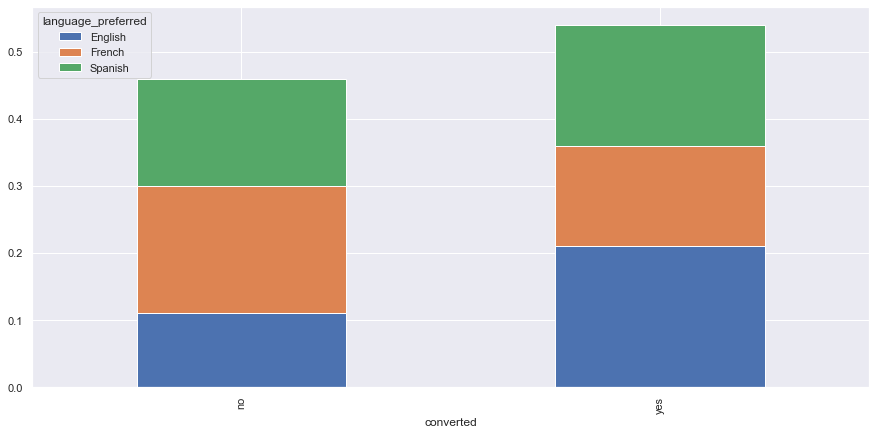

In [312]:
# visual analysis
pd.crosstab(df.converted,df.language_preferred,normalize=True).plot(kind='bar',stacked=True, figsize=(15,7));

<span style="color:blue">
    
### Step 1: Define null and alternative hypotheses
    
</span>


<span style="color:blue">
    
$H_0:$ Converted and language_preferred are independent of each other

$H_a:$ Converted and language_preferred are dependent on each other
    
</span>



<span style="color:blue">
    
### Step 2: Select appropriate test
    
</span>

 <span style="color:blue">
    
### Let's test whether the Chi-square Test for Independence assumptions are satisfied or not for the dependence between two categorical variables

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
  
## We can use the Chi-square Test for Independence for this problem
    
 </span>

<span style="color:blue">
    
### Step 3: Decide the significance level
    
</span>

<span style="color:blue">
    
Let's set the level of significane (alpha) as 0.05
    
 </span>

<span style="color:blue">
    
### Step 4: Collect and prepare data
    
</span>

In [313]:
df = pd.read_csv('abtest.csv')
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.converted,df.language_preferred)
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


<span style="color:blue">
    
### Step 5: Calculate the p-value
    
</span>

<span style="color:blue">

We will use the `chi2_contingency` function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input 
and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

</span>

In [314]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370837
p-value = 0.21298887487543447
Degrees of freedom = 2
Expected frequencies 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


<span style="color:blue">
    
### Step 6: Compare the p-value with $\alpha$
    
</span>

In [315]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


<span style="color:blue">
    
### Step 7: Draw inference
    
</span>

<span style="color:blue">

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that Converted and language_preferred are dependent of each other

</span>

## 4. Is the time spent on the new page same for the different language users?

<span style="color:blue">
    
### Visualize the data 
    
</span>

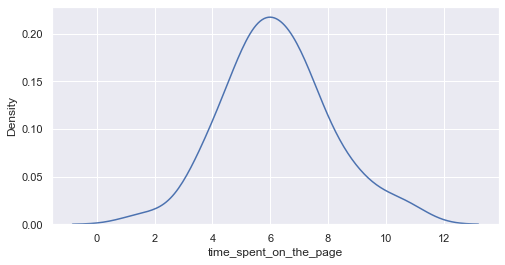

In [316]:
df = pd.read_csv('abtest.csv')
df2 = df.loc[df['landing_page'] == 'new']
sns.kdeplot(df2['time_spent_on_the_page']);

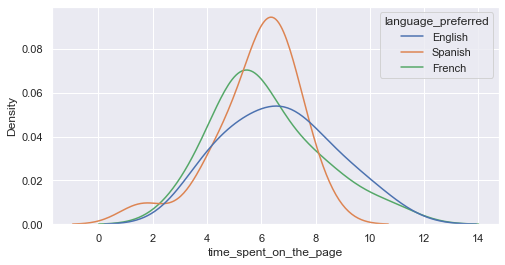

In [317]:
sns.kdeplot(x = 'time_spent_on_the_page', hue = 'language_preferred', data = df2);

<span style="color:blue">
    
### Step 1: Define null and alternative hypotheses
    
</span>

<span style="color:blue">
    
Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page with respect to different language users i.e  English, Freanch and Spanish respectively.

The null and alternative hypotheses can be formulated as:

>$H_0: \mu_1 = \mu_2 = \mu_3$   The mean time spent on the new page with respect to different language users is equal. <br>
> $H_a: $ At least one mean time spent on the new page with respect to different language users is different from the rest.
    
</span>

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


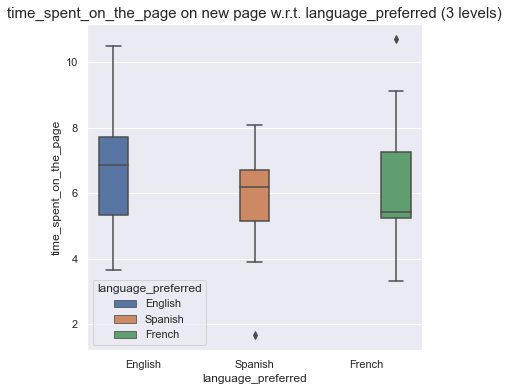

In [318]:
# mean of carbon emission at different levels of the fuel_type factor
print(df2.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df2, hue = 'language_preferred')
a.set_title("time_spent_on_the_page on new page w.r.t. language_preferred (3 levels)", fontsize=15)
plt.show()

<span style="color:blue">
    
### Step 2: Select Appropriate test
    
</span>

<span style="color:blue">
Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.
    
</span>

<span style="color:blue">
    
### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time_spent_on_the_page for a new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time_spent_on_the_page for a new page does not follow a normal distribution
    
</span>

In [319]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df2['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


<span style="color:blue">

Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

</span>


<span style="color:blue">

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest
    
</span>

In [320]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df2['time_spent_on_the_page'][df2['language_preferred']=="English"], 
                                   df2['time_spent_on_the_page'][df2['language_preferred']=="French"], 
                                   df2['time_spent_on_the_page'][df2['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


<span style="color:blue">

Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

</span>

<span style="color:blue">
    
### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

</span>

<span style="color:blue">
    
### Step 3: Decide the significance level
    
</span>

<span style="color:blue">
    
Let's set the level of significane (alpha) as 0.05
    
</span>

In [321]:
alpha = 0.05

<span style="color:blue">
    
### Step 4: Collect and prepare data
    
</span>

In [322]:
languages = df['language_preferred'].unique()
languages

array(['Spanish', 'English', 'French'], dtype=object)

In [323]:
def anova(cat, cont, df, type_ = 'anova', alpha = 0.05):

    languages = df[cat].unique()
    cont_list = []
    for i in ages:
        cont_sample = df[df[cat] == i][cont].values
        cont_list.append(cont_sample)
        
    sns.kdeplot(x = cont, hue = cat, data = df)    
#     plt.show()
    
    if len(cont_list) == 2:
        if type_ == 'anova':
            stat, p_value = stats.f_oneway(cont_list[0], cont_list[1])
        elif type_ == 'ttest':
            stat, p_value = stats.ttest_ind(cont_list[0], cont_list[1])
        
    elif len(cont_list) == 3:
        stat, p_value = stats.f_oneway(cont_list[0], cont_list[1], cont_list[2])
    
    if p_value > alpha:
        state = 'H0 is accepted, difference is NOT sigificant \n p_value: {}, stat: {}'.format(round(p_value,2), round(stat,2))
    else:
        state = 'H0 is rejected, difference IS sigificant \n p_value: {}, stat: {}'.format(round(p_value,2),round(stat,2))
        
    plt.title(state)

<span style="color:blue">
    
### Step 5 and 6: Calculate the p-value and compare with alpha
    
</span>

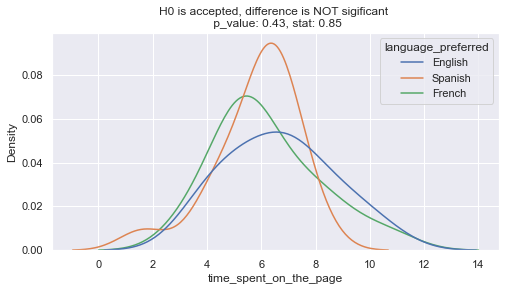

In [324]:
anova('language_preferred', 'time_spent_on_the_page', df2)

<span style="color:blue">
    
### Step 7: Draw inference
    
</span>

<span style="color:blue">

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean time spent on the new page with respect to different language users is different. 
    
</span>


<span style="color:blue">


### Multiple Comparison test (Tukey HSD) --> Ascertaining the above obtanied result

In order to identify for which language preferred mean time_spent_on_the_page is different from other languages, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

</span>

In [325]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df2['time_spent_on_the_page'], groups = df2['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


<span style="color:blue">

### Insight

As the p-values (refer to the p-adj column) for comparing the mean time_spent_on_the_page on a new page for English, French and Spanish 
is greater than the significance level, the null hypothesis of equality of all population means cannot be rejected.

Thus, we can say that the mean time_spent_on_the_page on a new page for English, French and Spanish is the same.

</span>

## Conclusion and Business Recommendations

<span style="color:blue">

### Insight

Statistical evidence shows that the new landing page that has a new outline & more relevant content shown compared to the old page is well received by the users

</span>

___